<a href="https://colab.research.google.com/github/MCannas/BusinessIntelligence/blob/master/1_8_1_Kalifornien_Hauspreise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
def calculate_price(number_rooms, location, machine_learning_model):
    # number_rooms und location sind Eingaben in unser Modell
    # price ist die Ausgabe
    price = machine_learning_model.predict(number_rooms, location)
    return price

In [2]:
import os # u.a. zur Entwicklung plattformübergreifender Systempfade
import yaml # für Konfigurationen
import pandas as pd # Datenmanagement
import numpy as np # Hilfsfunktionen für mathematische Operationen

# Datenvisualisierung
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.getcwd()
FILE_PATH = "housing.csv"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [4]:
df = pd.read_csv(FILE_PATH) # Wir lesen die Datei housing.csv ein
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# wie viele Datenpunkte haben nicht-vollständige Attribute?
num_missing = len(df) - len(df.dropna())
ratio_missing = num_missing / len(df)
# wir konvertieren in Prozente und runden auf 3 Nachkommastellen
ratio_missing = np.round(ratio_missing * 100, 3)
print(f"{ratio_missing}% der Daten ({num_missing} Punkte) haben fehlende Werte!")

0.0% der Daten (0 Punkte) haben fehlende Werte!


In [9]:
df.loc[df.isnull().sum(axis=1) == 1] # ein kleiner Trick zum anzeigen von Daten mit fehlenden Attributen

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['longitude']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'longitude'}, axis=1)
              .sort_values('longitude', ascending=True))
  xs = counted['longitude']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('longitude', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('longitude')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['latitude']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'latitude'}, axis=1)
              .sort_values('latitude', ascending=True))
  xs = counted['latitude']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('latitude', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('latitude')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['housing_median_age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'housing_median_age'}, axis=1)
              .sort_values('housing_median_age', ascending=True))
  xs = counted['housing_median_age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('housing_median_age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('housing_median_age')
_ = plt.ylabel('count()')

In [7]:
df.isnull().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df = df.dropna() # löscht alle Zeilen mit fehlenden Attributen
df = df.reset_index(drop=True) # zählt unsere Daten neu durch

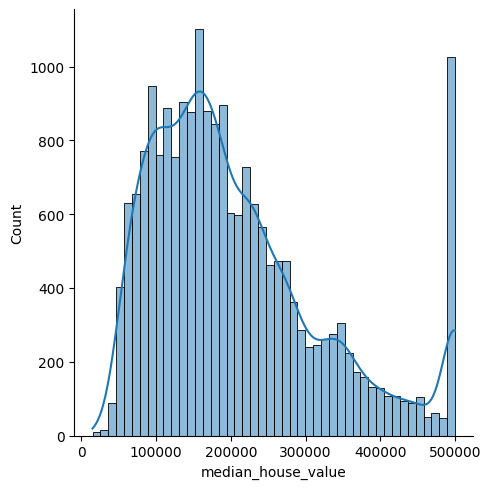

In [11]:
sns.displot(data=df, x="median_house_value", kde=True);

In [12]:
description = df.describe()
description

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
bins = [0] + list(description["median_house_value"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]
print(bins) # 0 bis 119.500 = 0 - 25% Quantil, 119.500 bis 179.700 = 25 - 50% Quantil, ...

[0, 119500, 179700, 264700, inf]


In [14]:
df["house_cat"] = pd.cut(
    df["median_house_value"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)

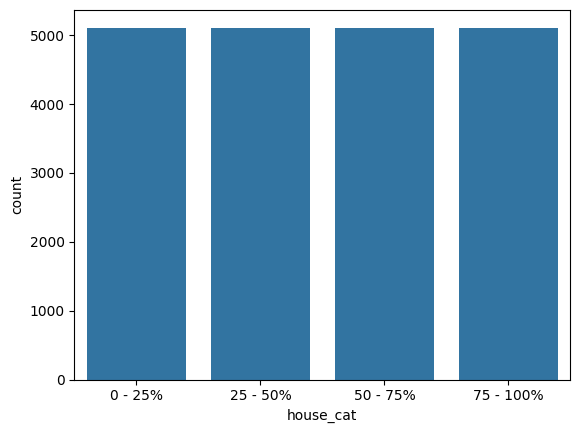

In [15]:

sns.countplot(data=df, x="house_cat");

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

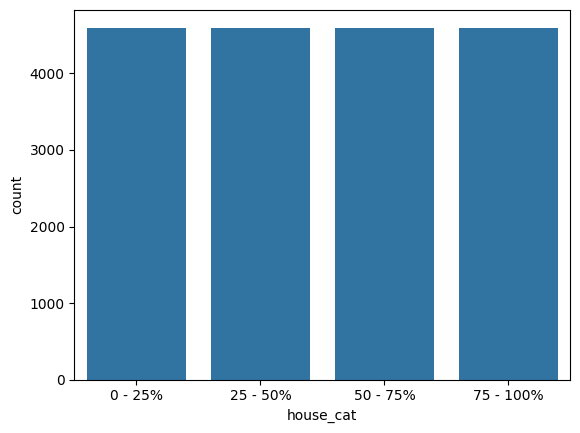

In [17]:
sns.countplot(data=df_train, x="house_cat");

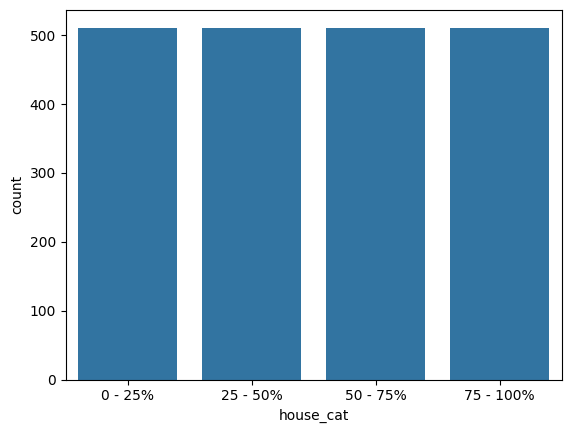

In [18]:
sns.countplot(data=df_test, x="house_cat");

In [19]:
df_train = df_train.drop("house_cat", axis=1)
df_test = df_test.drop("house_cat", axis=1)